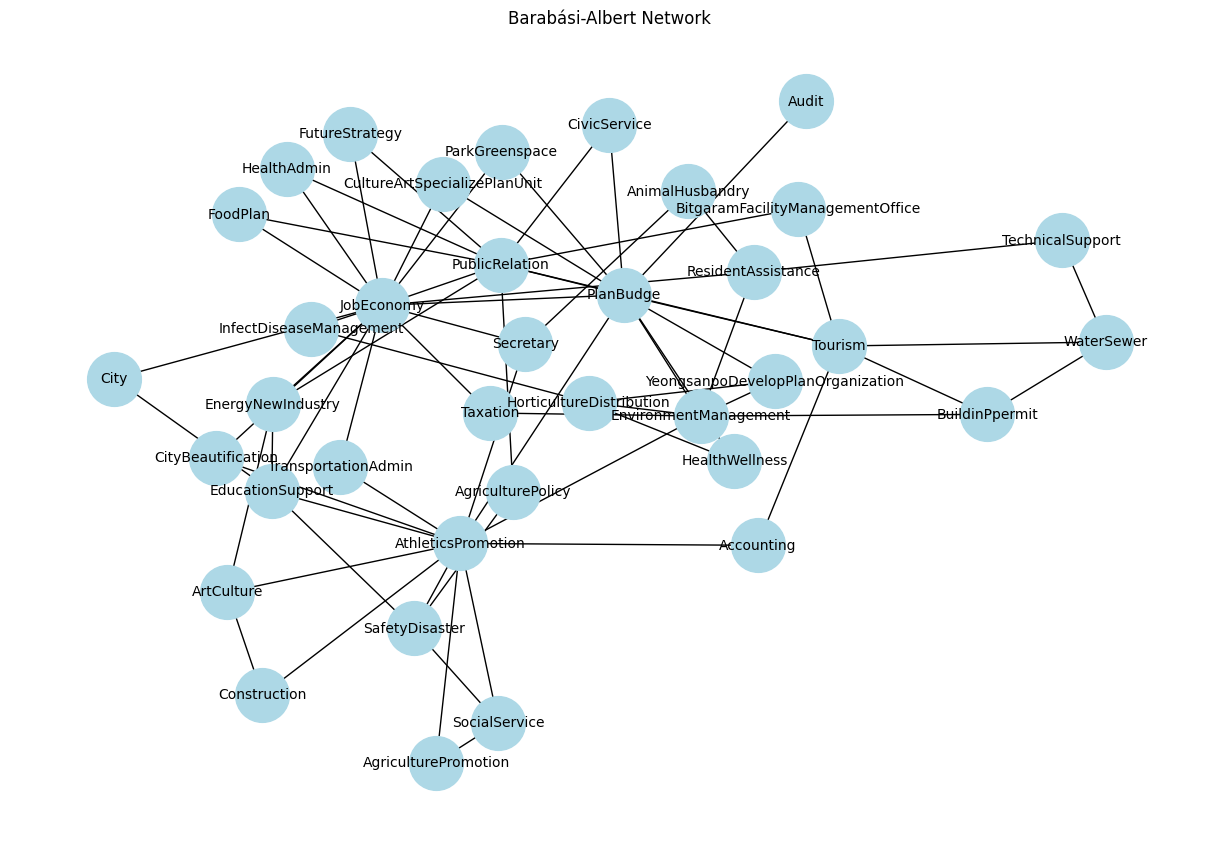

In [5]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

nodes_file = "Department_Collaborate_node.csv"
nodes_df = pd.read_csv(nodes_file, names=["id", "label"])

# 2. 바라바시-앨버트 네트워크 생성
n = len(nodes_df)  # 총 노드 수
m = 2  # 새 노드가 연결할 기존 노드의 수
ba_graph = nx.barabasi_albert_graph(n, m)

# 3. 노드 이름 속성 추가
for i, row in nodes_df.iterrows():
    ba_graph.nodes[row['id'] - 1]['name'] = row['label']  # NetworkX 노드는 0부터 시작

# 4. 네트워크 시각화
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(ba_graph, seed=42)  # 시각화를 위한 레이아웃
nx.draw(
    ba_graph, pos, with_labels=True, labels=nx.get_node_attributes(ba_graph, 'name'),
    node_size=1500, node_color="lightblue", font_size=10, font_color="black"
)
plt.title("Barabási-Albert Network")
plt.show()

# 5. 네트워크를 엣지 리스트로 저장
nx.write_edgelist(ba_graph, "ba_network_edges.csv", delimiter=",")


Evaluation

In [17]:
import random

# 1. 기존 네트워크의 엣지 파일에서 총 가중치 합산
edges_df = pd.read_csv('./Department_Collaborate_Vision/vision_2_edges.csv')  # source, target, weight 열 포함

# 엣지 가중치의 총합 계산
total_weight = edges_df['Weight'].sum()

# 3. 바라바시 네트워크의 모든 엣지에 랜덤 가중치 분배
edges = list(ba_graph.edges())
random_weights = [random.uniform(0.1, 1.0) for _ in range(len(edges))]  # 엣지별 초기 랜덤값 생성

# 랜덤 가중치 정규화 및 총 가중치 분배
normalized_weights = [w / sum(random_weights) * total_weight for w in random_weights]

# 엣지에 가중치 할당
for (u, v), weight in zip(edges, normalized_weights):
    ba_graph[u][v]['weight'] = weight

node_weights = {}
for node in ba_graph.nodes():
    # 노드의 모든 인접 엣지 가중치 절반들의 합
    total_weight = sum(ba_graph[node][neighbor]['weight'] / 2 for neighbor in ba_graph.neighbors(node))
    node_weights[node] = total_weight

# 3. 페이지랭크 계산 (기본 설정으로 계산)
pagerank = nx.pagerank(ba_graph)

# 4. 노드 가중치를 페이지랭크 값에 곱하기
adjusted_node_weights = {node: node_weights[node] * pagerank[node] for node in ba_graph.nodes()}

# 5. 네트워크의 전체 페이지랭크 값 더하기 (Total Performance of Network)
total_performance = sum(adjusted_node_weights.values())

# 6. 결과 출력
print(f"Total Performance of Network: {total_performance}")

Total Performance of Network: 186295.32824939195
